In [15]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import poisson 
from scipy.stats import expon
from cycler import cycler

In [16]:
# Parámetros de estilo de la gráfica
tex_fonts = {
    "text.usetex": False,
    "font.family": "serif",
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

from cycler import cycler
# Set a global color cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=[
    "#72B5E5",  # Celeste más apagado
    "#3A88C9",  # Azul intermedio más intenso
    "#2554A5",  # Azul profundo (cercano al azul real)
    "#5A33C9",  # Azul violáceo intenso
    "#6825A5",  # Violeta frío fuerte
    "#75189D"   # Púrpura frío vibrante con alto contraste
])

plt.style.use('seaborn-v0_8-white')
plt.rcParams.update(tex_fonts)

In [17]:
np.random.seed(1234)
sample_mean = 10
sample_size = 10000
sample = np.array([poisson.rvs(sample_mean, size=1) for ii in range(sample_size)])
N_bins = max(sample)[0]

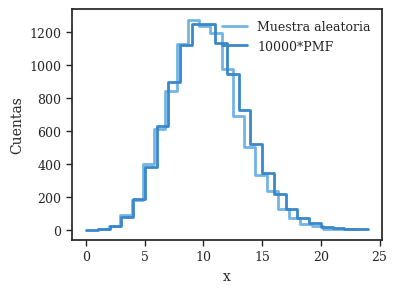

In [18]:
x = np.arange(0, N_bins+1, 1)
histogram = np.histogram(sample, bins=N_bins)
plt.figure(figsize=(4,3))
plt.plot(histogram[1][:-1], histogram[0], drawstyle='steps-post', label=r'Muestra aleatoria', linewidth=2)
plt.plot(x, sample_size*poisson.pmf(x, sample_mean),drawstyle='steps-post', label=r'{}*PMF'.format(sample_size), linewidth=2)
plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
plt.legend()
plt.xlabel('x')
plt.ylabel('Cuentas')
plt.savefig('gen_poisson.png', dpi=300, bbox_inches='tight')

In [19]:
gamma = 0.182

def poisson_simulation(N_0, gamma, resol= 10, times=5):
    tau = 1/gamma
    dt = tau/resol
    p = dt*gamma

    time = np.linspace(0, times*tau, times*resol)
    nuclei = np.zeros(times*resol)
    nuclei[0] = N_0

    for ii in range(times*resol-1):
        if nuclei[ii] > 0:
            x = poisson.rvs(nuclei[ii]*p, size=1)
            nuclei[ii+1] = max(nuclei[ii]-int(x[0]), 0)
    
    return time, nuclei, dt

def exponential_simulation(N_0, gamma, resol= 10, times=5):
    tau = 1/gamma
    dt = tau/resol

    raw_sample = expon.rvs(scale=tau, size=N_0)
    hist = np.histogram(raw_sample[raw_sample<times*tau], bins=times*resol)
    
    time, decais, dt = hist[1][:-1], hist[0], dt

    return time, decais, dt

def binomial_simulation(N_0, gamma, resol= 10, times=5):
    tau = 1/gamma
    dt = tau/resol
    p = dt*gamma

    time = np.linspace(0, times*tau, times*resol)
    nuclei = np.zeros(times*resol)
    nuclei[0] = N_0

    for ii in range(times*resol-1):
        if nuclei[ii] > 0:
            sample = np.random.random(int(nuclei[ii]))
            x = sample[sample<p].size
            nuclei[ii+1] = max(nuclei[ii]-int(x), 0)
    
    return time, nuclei, dt

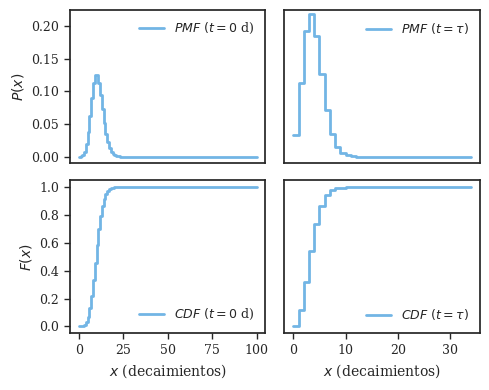

In [20]:
np.random.seed(1234)
time, nuclei, dt = poisson_simulation(100, gamma)

a = np.abs(time-1/gamma)
tau_index = np.where(a==a.min())[0][0]

fig = plt.figure(figsize=(5,4))

x1 = np.arange(nuclei[0]+1)
pmf1 = poisson.pmf(x1, nuclei[0]*gamma*dt)
cdf1 = poisson.cdf(x1, nuclei[0]*gamma*dt)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,3)
ax1.plot(x1, pmf1, drawstyle='steps-post', label=r'$PMF$ $(t = 0$ d)', linewidth=2)
ax2.plot(x1, cdf1, drawstyle='steps-post', label=r'$CDF$ $(t = 0$ d)', linewidth=2)

x2 = np.arange(nuclei[tau_index]+1)
pmf2 = poisson.pmf(x2, nuclei[tau_index]*gamma*dt)
cdf2 = poisson.cdf(x2, nuclei[tau_index]*gamma*dt)
ax3 = fig.add_subplot(2,2,2)
ax4 = fig.add_subplot(2,2,4)
ax3.plot(x2, pmf2, drawstyle='steps-post', label=r'$PMF$ $(t = \tau)$',linewidth=2)
ax4.plot(x2, cdf2, drawstyle='steps-post', label=r'$CDF$ $(t = \tau)$', linewidth=2)

ax1.set_ylim((-.01, .225))
ax3.set_ylim((-.01, .225))

ax1.set_xticks([])
ax3.set_xticks([])

ax3.set_yticks([])
ax4.set_yticks([])

ax1.set_ylabel(r'$P(x)$')
ax2.set_ylabel(r'$F(x)$')

ax2.set_xlabel(r'$x$ (decaimientos)')
ax4.set_xlabel(r'$x$ (decaimientos)' )

ax1.tick_params(axis  = 'y', which = 'both', direction = 'out', length = 4, width = 1)
ax2.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
ax4.tick_params(axis  = 'x', which = 'both', direction = 'out', length = 4, width = 1)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.tight_layout()

plt.savefig('pmf_and_cdf.png', dpi=300, bbox_inches='tight')


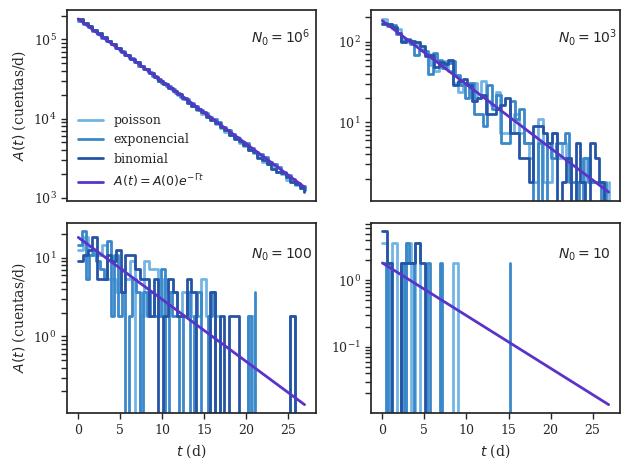

In [21]:
np.random.seed(12345)

fig2 = plt.figure()
cases = [int(1e6), int(1e3), 100, 10]
ax = [0,0,0,0]


for ii, N_0 in enumerate(cases):
    ax[ii] = fig2.add_subplot(2,2,ii+1)

    #Poisson
    time, nuclei, dt = poisson_simulation(N_0, gamma)
    A = (nuclei[:-1]-nuclei[1:])/dt
    ax[ii].plot(time[:-1], A, drawstyle='steps-post', label=r'poisson', linewidth=2)

    #Exponential
    time, decais, dt = exponential_simulation(N_0, gamma)
    A = decais/dt
    ax[ii].plot(time, A, drawstyle='steps-post', label='exponencial', linewidth=2)

    #Poisson
    time, nuclei, dt = binomial_simulation(N_0, gamma)
    A = (nuclei[:-1]-nuclei[1:])/dt
    ax[ii].plot(time[:-1], A, drawstyle='steps-post', label=r'binomial', linewidth=2)


    ax[ii].plot(time[:-1], N_0*gamma*np.exp(-gamma*time[:-1]), label=r'$A(t)=A(0)e^{-\Gamma t}$', linewidth=2)

    ax[ii].tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
    ax[ii].set_ylabel(r'$A(t)$ (cuentas/d)')
    ax[ii].set_xlabel(r'$t$ (d)')

    ax[ii].semilogy()

ax[0].set_xticks([])
ax[1].set_xticks([])
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[3].set_ylabel('')

ax[0].legend()
fig2.text(.88,.45,rf'$N_0=10$')
fig2.text(.88,.9,rf'$N_0=10^3$')
fig2.text(.4,.45,rf'$N_0=100$')
fig2.text(.4,.9,rf'$N_0=10^6$')


fig2.tight_layout()

plt.savefig('simul.png',dpi=300, bbox_inches='tight')
